# Exploratory Data Analysis (EDA)

This notebook explores key patterns and relationships between borrower
features and loan default behavior in the Lending Club dataset.


## Imports & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("../data/raw/loan_data.csv")

##  Separate Target for Comparison

In [4]:
paid = df[df['not.fully.paid'] == 0]
default = df[df['not.fully.paid'] == 1]

## Default Rate by Loan Purpose

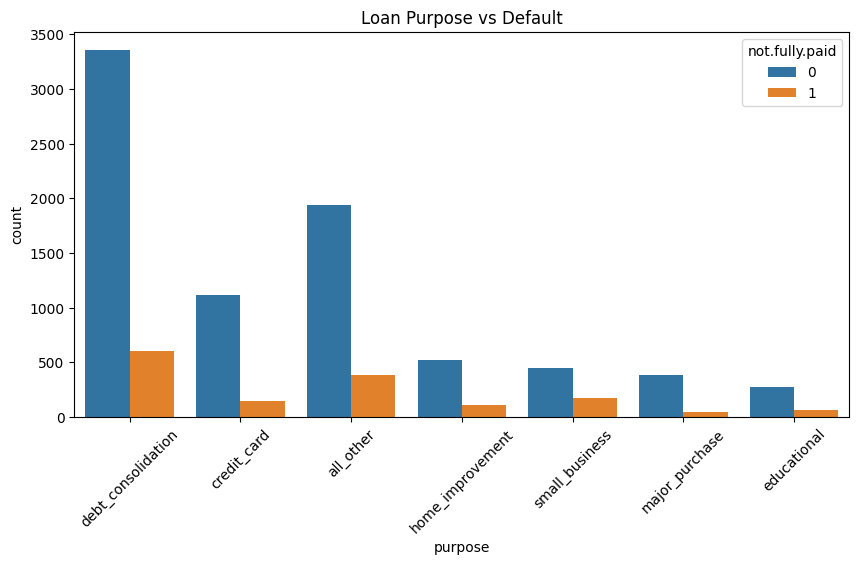

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x="purpose",
    hue="not.fully.paid"
)
plt.xticks(rotation=45)
plt.title("Loan Purpose vs Default")
plt.show()

Certain loan purposes such as small business and debt consolidation  show a higher proportion of defaults compared to others.


## Interest Rate vs Default

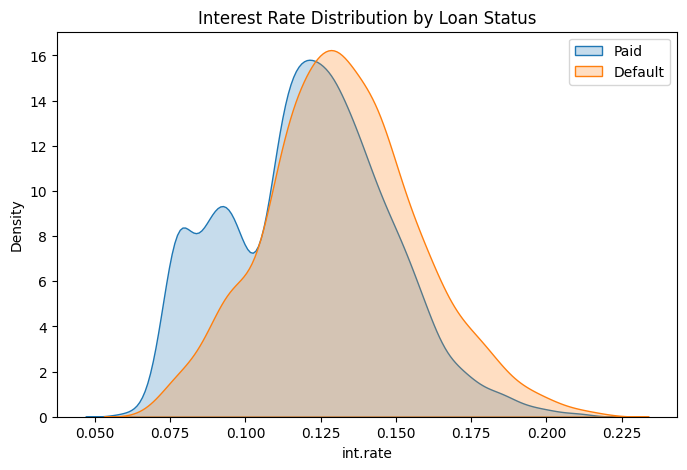

In [6]:
plt.figure(figsize=(8,5))
sns.kdeplot(paid["int.rate"], label="Paid", fill=True)
sns.kdeplot(default["int.rate"], label="Default", fill=True)
plt.title("Interest Rate Distribution by Loan Status")
plt.legend()
plt.show()

- Defaults are skewed toward higher interest rates
- LendingClub assigns higher rates to riskier borrowers

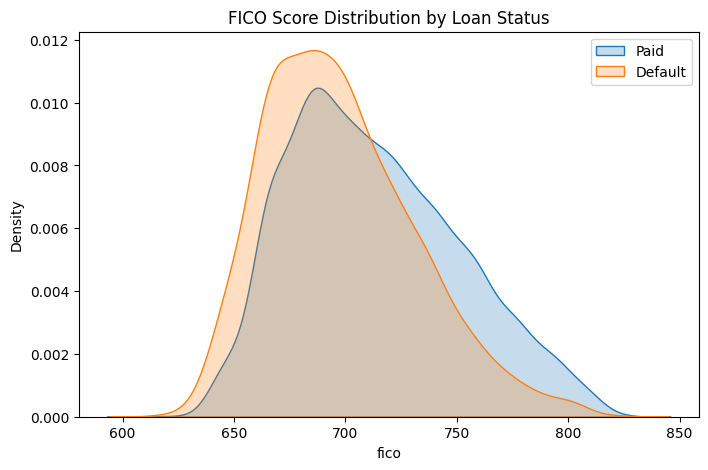

In [7]:
plt.figure(figsize=(8,5))
sns.kdeplot(paid["fico"], label="Paid", fill=True)
sns.kdeplot(default["fico"], label="Default", fill=True)
plt.title("FICO Score Distribution by Loan Status")
plt.legend()
plt.show()

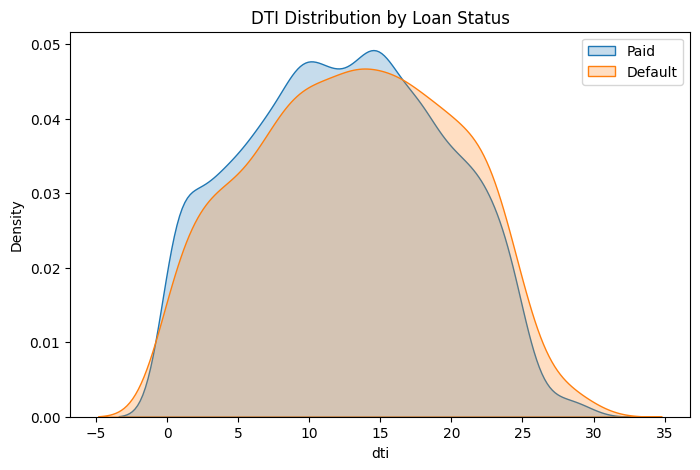

In [8]:
plt.figure(figsize=(8,5))
sns.kdeplot(paid["dti"], label="Paid", fill=True)
sns.kdeplot(default["dti"], label="Default", fill=True)
plt.title("DTI Distribution by Loan Status")
plt.legend()
plt.show()


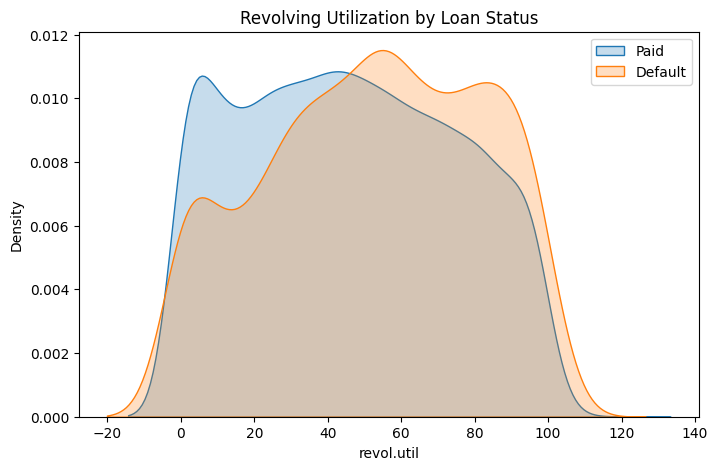

In [9]:
plt.figure(figsize=(8,5))
sns.kdeplot(paid["revol.util"], label="Paid", fill=True)
sns.kdeplot(default["revol.util"], label="Default", fill=True)
plt.title("Revolving Utilization by Loan Status")
plt.legend()
plt.show()


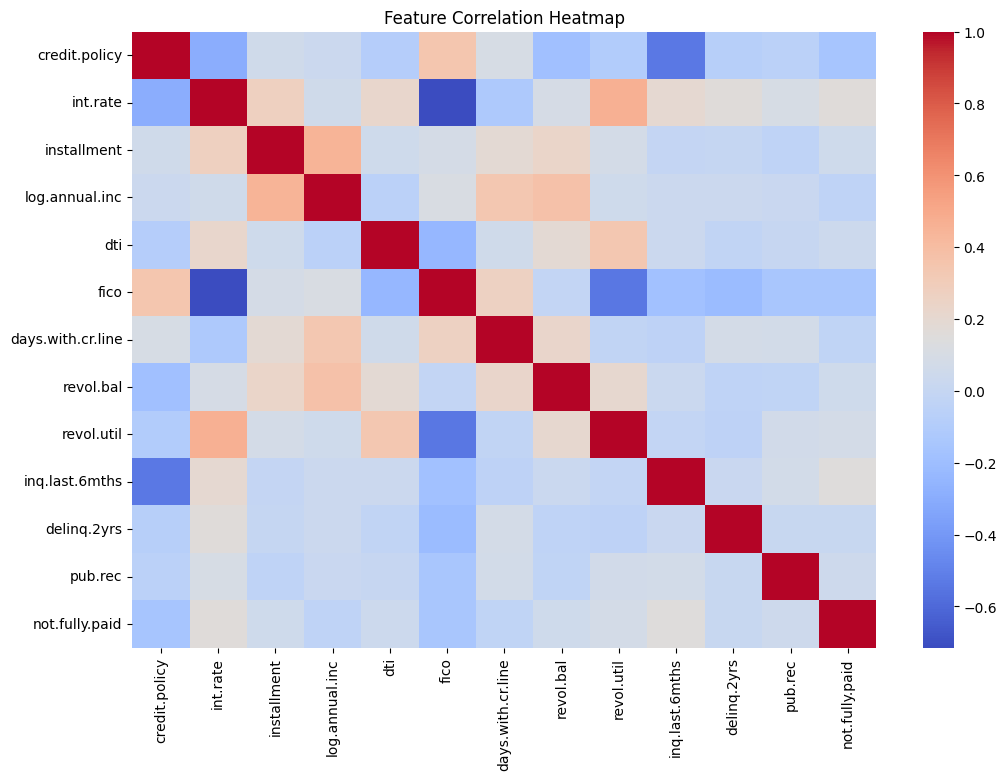

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df.select_dtypes(include=np.number).corr(),
    cmap="coolwarm",
    annot=False
)
plt.title("Feature Correlation Heatmap")
plt.show()


## Key Insights from EDA

- Loans with higher interest rates show higher default risk.
- Borrowers with lower FICO scores are significantly more likely to default.
- Higher debt-to-income ratios correlate with higher default probability.
- Certain loan purposes carry higher risk.
- Some numerical features show strong correlation and will be reviewed
  during feature engineering.